# Analisando o engajamento do Instagram

### O que queremos responder?
- Qual tipo de conteúdo **mais engaja** no Instagram da minha empresa?
<br><br>
- Temos a base de dados do Instagram **desde que o usuário começou a postar na marca até o dia 27/março**
<br><br>
- Ele também dá alguns direcionamentos:
    - Vamos analisar curtidas e comentários
    - Quando a coluna "Tag" estiver vazia, signfica que o post não foi tagueado


##### Vamos importar e visualizar a nossa base

In [2]:
# Importando o pandas. Faremos toda a análise apenas com este pacote
import pandas as pd

In [3]:
# Importar a base em excel (como está na pasta onde está o notebook, não preciso colocar todo o caminho)
base = pd.read_excel('Dados_instagram.xlsx')

In [4]:
# Visualizando as 5 primeiras linhas
base.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,82878.0,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


In [5]:
# Apagando a coluna "Visualizações", pois conforme a orientação dada, ela não será analisada
base = base.drop("Visualizações",axis=1)

In [6]:
# Visualizando novamente as 5 primeiras linhas
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [7]:
# Visualizando as 5 últimas linhas
base.tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,NaN,5566
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,NaN,29563
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,NaN,4999


In [8]:
# Tamanho da base
print(base.shape)

(52, 9)


Podemos ver que é uma base pequena, de apenas 52 linhas. Neste caso, conseguimos visualizar ela inteira com o display

In [9]:
display(base)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
6,Foto,2021-09-19,21597,852,Novos Produtos,S,S,NaN,22449
7,Foto,2021-09-25,6346,33,Produtos,N,S,NaN,6379
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,NaN,4137


In [10]:
# Verificando as informações
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


Aqui vemos que a base está quase toda completa. A coluna "Tags" possui menos de 52 valores não nulos, mas já nos foi dito que posts sem tag terão essa coluna nula. Chama a atenção a coluna "Carrossel" que tem apenas 8 valores não nulos.


In [11]:
# Contando os valores que aparecem na coluna Carrossel
base['Carrossel'].value_counts()

Carrossel
S    8
Name: count, dtype: int64

 Ou seja, o valor "S" indica que a postagem foi feita em formato de Carrossel (várias fotos/vídeos). Na verdade, os valores nulos são de postagens que não são carrossel. Sendo assim o nulo deveria ser "N"

##### Tratando os valores nulos

In [12]:
# Filtrando os valores em que carrossel é nulo (apenas para visualização)
base[base["Carrossel"].isnull() == True]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437
6,Foto,2021-09-19,21597,852,Novos Produtos,S,S,NaN,22449
7,Foto,2021-09-25,6346,33,Produtos,N,S,NaN,6379
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,NaN,4137
10,Reels,2021-10-10,12894,249,Trends/Produtos,S,N,NaN,13143
11,Foto,2021-10-12,17831,391,NaN,S,S,NaN,18222


In [13]:
# Buscando valores que NÃO sao nulos 
base.loc[base["Carrossel"].notnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
12,Foto,2021-10-21,6166,55,Novos Produtos,S,S,S,6221
21,Foto,2021-12-23,8328,93,Produtos,S,N,S,8421
25,Foto,2022-01-02,12193,138,Novos Produtos,S,N,S,12331
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939
28,Foto,2022-01-15,9936,119,Novos Produtos,S,N,S,10055
40,Foto,2022-02-21,21621,213,Influenciadores,S,S,S,21834


In [14]:
# Atribuindo "N" aos valores nulos da coluna Carrossel
base.loc[base["Carrossel"].isnull(), "Carrossel"] = "N"

In [15]:
# Verificando novamente os valores dessa coluna
base["Carrossel"].value_counts()

Carrossel
N    44
S     8
Name: count, dtype: int64

In [16]:
# Verificando novamente toda a base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    52 non-null     object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


Feitos alguns tratamentos simples de limpeza e organização da base, podemos proceder para as análises 

In [17]:
# Descrição estatística da base
base.describe()

,Data,Curtidas,Comentários,Interacoes
count,52,52.000000,52.000000,52.000000
mean,2021-12-23 04:36:55.384615424,12262.730769,189.500000,12452.230769
min,2021-09-11 00:00:00,2807.000000,9.000000,2816.000000
25%,2021-10-23 06:00:00,5492.000000,69.500000,5562.500000
50%,2022-01-05 00:00:00,9603.000000,128.000000,9773.500000
75%,2022-02-15 12:00:00,17621.750000,265.250000,17920.750000
max,2022-03-27 00:00:00,37351.000000,852.000000,37853.000000
std,NaN,8165.875326,170.687709,8299.390088


##### Visualizando essas informações de maneira gráfica

 Uma primeira análise pode ser verificar se as interações nos posts vêm crescendo ao longo do tempo, já que temos uma coluna de data. Para analisar a variação de uma variáveis númericas (Curtidas/Comentários) ao longo do tempo - ou seja, de uma variável de data ou data/hora - o tipo de gráfico recomendado é o gráfico de linha.

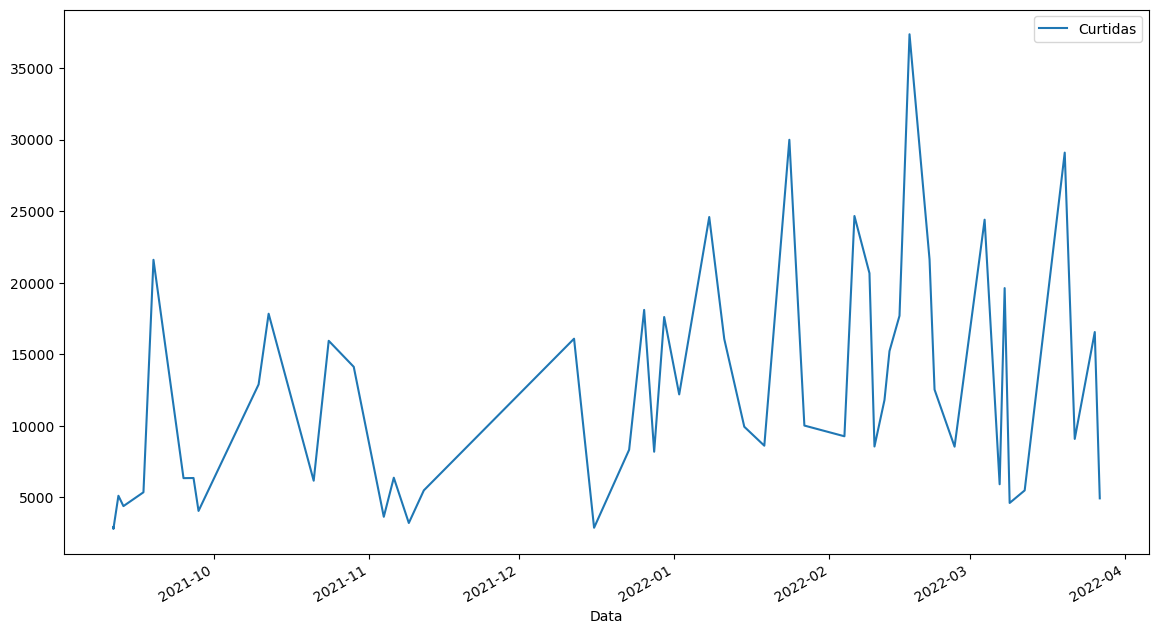

In [18]:
# Um gráfico de linha ao longo do tempo pode ajudar a ver se as interações vêm crescendo
base.plot(kind="line",x="Data",y="Curtidas",figsize=(14,8));

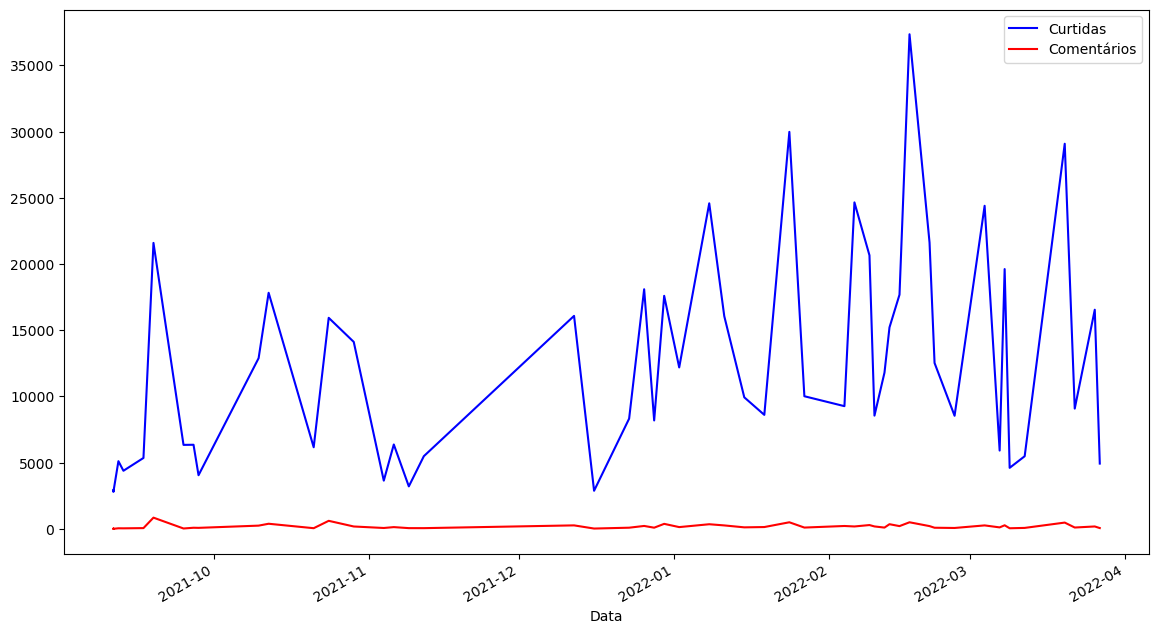

In [19]:
# Podemos colocar curtidas e comentários no mesmo gráfico
ax = base.plot(kind="line",x="Data",y="Curtidas",color="blue",label="Curtidas",figsize=(14,8));
base.plot(kind="line",x="Data",y="Comentários",color="red",label="Comentários",figsize=(14,8),ax=ax);

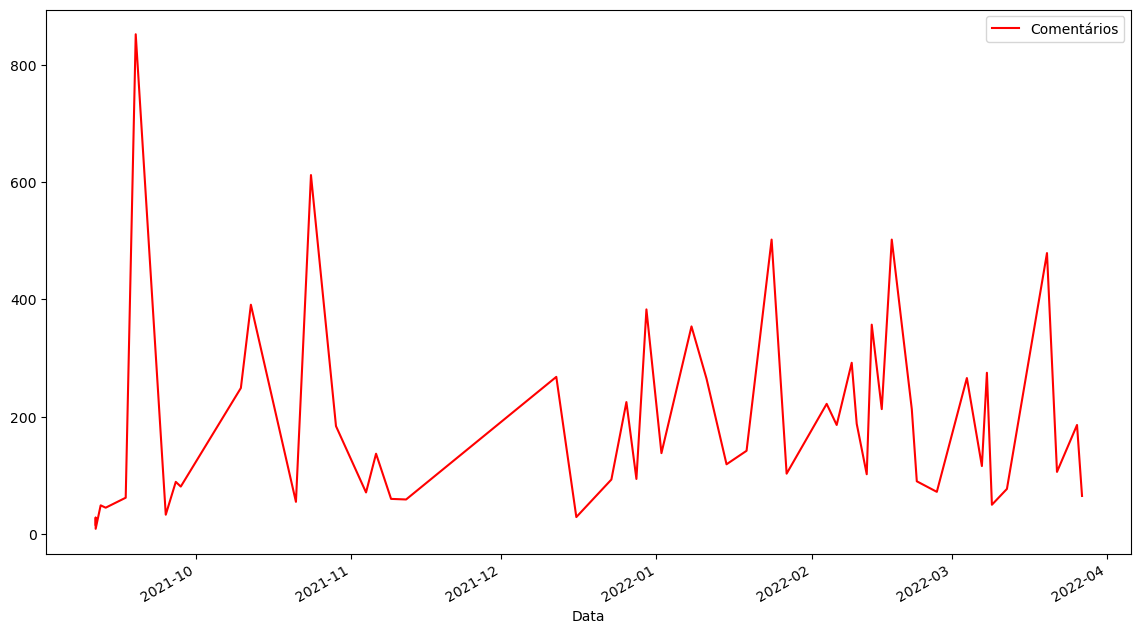

In [20]:
# A escala de curtidas pode estar atrapalhando a visualização, por isso vamos deixar comentários em um gráfico separado
base.plot(kind="line",x="Data",y="Comentários",color="red",label="Comentários",figsize=(14,8));

 Podemos ver que apesar de um pico entre fevereiro e março de 2022, não dá para dizer que o engajamento vem crescendo de forma constante. 
Uma outra pergunta que podemos fazer é se os posts mais curtidos necessariamente têm mais comentários. Como são 2 variáveis numéricas, o melhor gráfico para isso é o gráfico de dispersão.

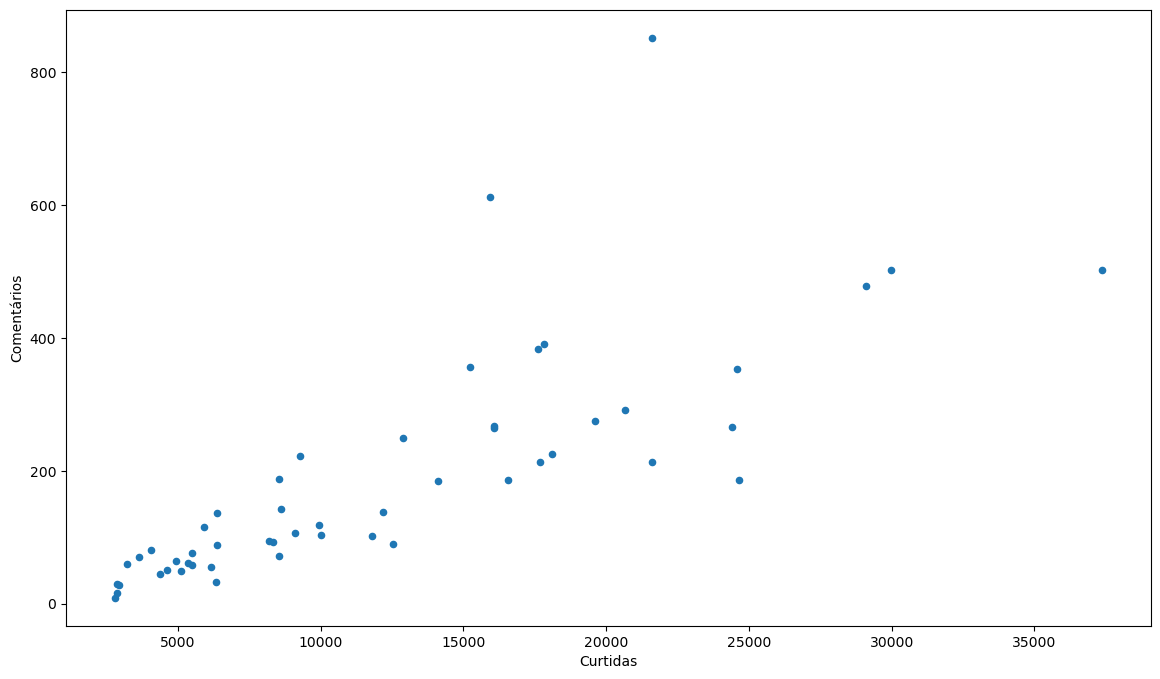

In [21]:
base.plot(kind="scatter",x="Curtidas",y="Comentários",figsize=(14,8));

Conforme imaginado, quanto mais curtidas uma publicação tem, em geral ela terá mais comentários.

Vamos agora tentar entender o que faz os posts terem mais ou menos engajamento

####

Antes de qualquer análise mais avançada, podemos simplesmente olhar os posts com mais e menos curtidas e ver se isso já nos traz alguma pista.

In [22]:
# Ordenando os valores
base.sort_values(by="Curtidas",ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [23]:
# Selecionando os 5 últimos valores 
base.sort_values(by="Curtidas",ascending=False).tail()
# outra opção seria usar base.sort_values(by="Curtidas",ascending=True).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


Conseguimos já observar 2 coisas:
- Nas 5 publicações com mais interações, havia pessoas no conteúdo. Nas 5 com menos interações, não.
- Todas as 5 publicações com mais interações faziam parte de uma Campanha, o que não é verdade para nenhuma das menos engajadas.

Isso já nos dá um indicativo de que esses fatores podem estar relacionado com a quantidade de interações nas publicações da empresa.

##### Podemos analisar as publicações agrupando esses valores com o <font color="green">group by</font>. 

In [24]:
# Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [25]:
# Agrupando as informações por tipo
base.groupby("Tipo")["Comentários"].sum()

Tipo
Foto     6963
IGTV      668
Reels    1222
Vídeo    1001
Name: Comentários, dtype: int64

In [26]:
# Analisando curtidas e comentários ao mesmo tempo
base.groupby("Tipo")[["Curtidas", "Comentários"]].sum()

,Curtidas,Comentários
Tipo,,
Foto,480281,6963
IGTV,34167,668
Reels,74365,1222
Vídeo,48849,1001


Nesse caso pode parecer que vídeo e IGTV são estratégias ruins que não devem ser usadas. Mas estamos olhando para o volume total de interações, sem levar em consideração que a quantidade de cada tipo é diferente.

In [27]:
base.Tipo.value_counts()
## Praticamente o mesmo que base.groupby("Tipo").count



Tipo
Foto     36
Vídeo     6
Reels     5
IGTV      5
Name: count, dtype: int64

Vamos portanto analisar a média

In [28]:
# Analisando curtidas e comentários ao mesmo tempo
base.groupby("Tipo")[["Curtidas", "Comentários"]].mean()

,Curtidas,Comentários
Tipo,,
Foto,"13,341.14",193.42
IGTV,"6,833.40",133.60
Reels,"14,873.00",244.40
Vídeo,"8,141.50",166.83


Vamos passar à análise do fator "Pessoas", para entender de fato se faz diferença na publicação. Vamos avançar no groupby agregando por mais de uma coluna e em seguida usando a função de agregação em várias colunas

In [29]:
# Agrupando só por pessoas
base.groupby("Pessoas")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Pessoas,,
N,"4,256.67",52.83
S,"14,664.55",230.50


In [30]:
# Agrupando por Tipo e Pessoas
base.groupby(["Tipo","Pessoas"])["Curtidas"].mean()

Tipo   Pessoas
Foto   N          3,863.50
       S         15,236.67
IGTV   S          6,833.40
Reels  N          5,934.50
       S         20,832.00
Vídeo  N          4,007.50
       S         16,409.50
Name: Curtidas, dtype: float64

In [31]:
base.groupby(["Tipo","Pessoas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas                       
Foto  N        3,863.50        29.50
      S       15,236.67       226.20
IGTV  S        6,833.40       133.60
Reels N        5,934.50        98.00
      S       20,832.00       342.00
Vídeo N        4,007.50        65.25
      S       16,409.50       370.00

Fica claro que em todos os formatos as publicações com Pessoas tiveram muito mais engajamento do que as que não tiveram Pessoas. Numa base maior poderíamos realizar um teste estatístico para medir se essa diferença é signifcativa, mas não é o escopo desta análise.


Vamos repetir o formato da análise para entender o fator "Campanha"

In [32]:
# Somente para campanhas
base.groupby("Campanhas")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Campanhas,,
N,"7,928.33",123.17
S,"18,173.27",279.95


In [33]:
base.groupby(["Tipo","Campanhas"])["Curtidas"].mean()

Tipo   Campanhas
Foto   N            9,049.44
       S           17,632.83
IGTV   N            6,833.40
Reels  N            8,254.33
       S           24,801.00
Vídeo  N            4,007.50
       S           16,409.50
Name: Curtidas, dtype: float64

In [34]:
base.groupby(["Tipo","Campanhas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Tipo  Campanhas                       
Foto  N          9,049.44       128.94
      S         17,632.83       257.89
IGTV  N          6,833.40       133.60
Reels N          8,254.33       148.33
      S         24,801.00       388.50
Vídeo N          4,007.50        65.25
      S         16,409.50       370.00

Também podemos observar um evidente impacto nas interações quando a publicação faz parte de uma campanha

Vendo que tanto a presença de pessoas quanto estar vinculado a uma campanha são fatores importantes, será que a combinação dos 2 é ainda melhor?

In [35]:
# Agregando por pessoas e campanhas
base.groupby(["Pessoas", "Campanhas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas                       
N       N          3,937.50        53.90
        S          5,852.50        47.50
S       N          9,923.75       157.80
        S         19,405.35       303.20

In [36]:
# Incluindo a coluna de campanhas
base.groupby(["Tipo", "Pessoas", "Campanhas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas Campanhas                       
Foto  N       N          2,869.00        20.50
              S          5,852.50        47.50
      S       N         10,815.29       159.93
              S         19,105.38       284.19
IGTV  S       N          6,833.40       133.60
Reels N       N          5,934.50        98.00
      S       N         12,894.00       249.00
              S         24,801.00       388.50
Vídeo N       N          4,007.50        65.25
      S       S         16,409.50       370.00

Parece que sim! A combinação dos 2 fatores traz médias ainda mais altas de engajamento.
Um outro fator que chama a atenção é que o vídeo, que antes aparecia com uma média baixa de engajamento no geral, teve uma média alta quando foi feito com Pessoas e parte de uma Campanha. E não há vídeos de vários tipos. Ou os vídeos não tiveram pessoas e não fizeram parte de campanhas, ou o total oposto.

In [37]:
# Vamos filtrar a base apenas onde o tipo é Vídeo
base[base.Tipo == "Vídeo"]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


Aqui percebemos que a loja tentou postar 4 vídeos mostrando seus produtos (sem nenhuma pessoa e fora de qualquer campanha) e o resultado foi baixo. 
Porém, em 2 vídeos de campanhas, um aproveitando uma Trend e outro em uma Data Comemorativa, ambos utilizando pessoas, o resultado foi bem positivo!

Vamos agora analisar os Carrosséis

In [38]:
# Carrossel (sem filtrar a base)
base.groupby("Carrossel")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,"12,343.61",198.43
S,"11,817.88",140.38


Aparentemente, o resultado não é bom. O engajamento cai nos carrosséis. Mas precisamos levar em conta o seguinte: não existe Carrossel em IGTV, Reels ou Video. O Carrossel ocorre apenas no formato Foto. Sim, pode haver um vídeo no meio do Carrossel, mas a base de dados exporta com o tipo "Foto". Precisamos então aplicar este filtro

In [39]:
# Podemos também filtrar a base
base[base.Tipo == "Foto"].groupby("Carrossel")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,"13,776.36",208.57
S,"11,817.88",140.38


Agora vamos analisar as Tags para entender quais conteúdos fizeram mais sucesso

In [40]:
base.groupby("Tags")["Curtidas"].mean()

Tags
Datas comemorativas                 17,975.00
Datas comemorativas/Promoções       29,084.00
Dicas de como usar/Novos Produtos    5,703.50
Dicas de como usar/Produtos          7,586.67
Influenciadores                     15,197.29
Loja                                 2,832.50
Loja/Produtos                        2,930.00
Novos Produtos                      11,619.57
Produtos                             5,666.92
Promoções                           26,645.50
Trends                              22,400.67
Trends/Produtos                     12,894.00
Name: Curtidas, dtype: float64

Podemos ver que uma publicação pode conter mais de uma tag. Quando for assim, precisamos criar uma linha para cada tag da publicação, mantendo as demais informações iguais. Isso é feito em 2 partes: primeiro a função "split" para transformar o campo em uma lista, depois a função "explode" para fazer essa conversão de uma linha em duas ou mais se necessário

In [41]:
base_Tags = base.copy()
base_Tags.Tags = base.Tags.str.split("/")
base_Tags.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,[Loja],N,N,N,2874
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,N,2958
2,Foto,2021-09-11,2807,9,[Loja],N,N,N,2816
3,Vídeo,2021-09-12,5115,49,[Produtos],N,N,N,5164
4,Foto,2021-09-13,4392,45,[Produtos],S,N,N,4437


In [42]:
base_Tags = base_Tags.explode("Tags")
base_Tags.head(10)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,N,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
6,Foto,2021-09-19,21597,852,Novos Produtos,S,S,N,22449
7,Foto,2021-09-25,6346,33,Produtos,N,S,N,6379
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444


Importante observar que, uma vez feito o split/explode, as linhas duplicadas/repetidas serão consideradas repetidas vezes em agregações como soma, média, etc, caso agrupemos pelas variáveis de antes (Pessoas/Campanhas/Carrossel/Data). Portanto, como fizemos o split/explode na coluna "Tags", usaremos essa base apenas para a análise de Tags. Por isso foi necessário criar primeiro uma cópia da base original e trabalhar em cima desta cópia.
Vamos então repetir alguns procedimentos feitos para as outras variáveis:

In [43]:
base_Tags.groupby("Tags")["Curtidas"].mean()

Tags
Datas comemorativas   20,752.25
Dicas de como usar     6,833.40
Influenciadores       15,197.29
Loja                   2,865.00
Novos Produtos        10,304.89
Produtos               6,269.82
Promoções             27,458.33
Trends                20,024.00
Name: Curtidas, dtype: float64

In [44]:
base_Tags.groupby("Tags")[["Curtidas", "Comentários"]].mean().sort_values("Curtidas", ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67


Aqui podemos ver uma discrepância na média de interações de algumas das Tags. Porém, é preciso lembrar que publicações sem Tag estão com essa coluna com valor nulo na base de dados. 
Portanto, precisamos ser capazes de comparar as Tags também com o engajamento das publicações sem Tag.

In [45]:
base_Tags[base.Tags.isnull()]

C:\Users\gmcos\AppData\Local\Temp\ipykernel_14332\113016434.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  base_Tags[base.Tags.isnull()]


,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,NaN,S,S,N,18222
19,Foto,2021-12-12,16086,268,NaN,S,S,N,16354
29,Foto,2022-01-19,8612,142,NaN,S,N,N,8754
38,Foto,2022-02-15,17687,213,NaN,S,N,N,17900
41,Foto,2022-02-22,12530,90,NaN,S,N,N,12620
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665
49,Foto,2022-03-22,9087,106,NaN,S,S,N,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,N,16737


In [46]:
base_Tags.loc[base.Tags.isnull(), "Tags"] = "Sem Tag"


In [47]:

base_Tags.groupby("Tags")[["Curtidas", "Comentários"]].mean().sort_values("Curtidas", ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Sem Tag,"15,347.88",207.75
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67


Vimos que Tags que pareciam por si só fortes como "Influenciadores" e "Novos Produtos" na verdade performaram pior do que posts sem nenhuma Tag. Vamos agora avançar na análise e entender o impacto de Pessoas e Campanhas nas tags.

In [48]:
base_Tags.groupby(["Pessoas", "Tags"])[["Curtidas", "Comentários"]].mean().sort_values("Curtidas", ascending=False)

Curtidas  Comentários
Pessoas Tags                                      
S       Promoções           27,458.33       531.00
        Datas comemorativas 20,752.25       343.50
        Trends              20,024.00       352.25
        Sem Tag             15,347.88       207.75
        Influenciadores     15,197.29       161.71
        Novos Produtos      10,923.12       215.62
        Produtos             8,316.38       131.62
        Dicas de como usar   6,833.40       133.60
N       Novos Produtos       5,359.00        62.00
        Produtos             4,450.67        60.78
        Loja                 2,865.00        17.67

De cara vemos como as publicações com Tags que não envolvem Pessoas tem desempenho inferior. Vamos agora ver, para cada Tag, quando há publicaçòes com e sem Pessoas, o impacto causado.  

In [71]:
# trazendo a quantidade de publicações em cada categoria, lembrando que como usamos o 'explode' há linhas com índices repetidos na base.
base_Tags['index'] = base_Tags.index
base_Tags.groupby(["Tags", "Pessoas"]).agg({"Curtidas":'mean', "Comentários": 'mean', "index": 'nunique'}).rename(columns={"index": "Contagem"})


Curtidas  Comentários  Contagem
Tags                Pessoas                                 
Datas comemorativas S       20,752.25       343.50         4
Dicas de como usar  S        6,833.40       133.60         5
Influenciadores     S       15,197.29       161.71         7
Loja                N        2,865.00        17.67         3
Novos Produtos      N        5,359.00        62.00         1
                    S       10,923.12       215.62         8
Produtos            N        4,450.67        60.78         9
                    S        8,316.38       131.62         8
Promoções           S       27,458.33       531.00         3
Sem Tag             S       15,347.88       207.75         8
Trends              S       20,024.00       352.25         4

In [72]:
# repetindo a análise, dessa vez para Campanhas
base_Tags.groupby(["Tags", "Campanhas"]).agg({"Curtidas":'mean', "Comentários": 'mean', "index": 'count'}).rename(columns={"index": "Contagem"})

Curtidas  Comentários  Contagem
Tags                Campanhas                                 
Datas comemorativas S         20,752.25       343.50         4
Dicas de como usar  N          6,833.40       133.60         5
Influenciadores     N          6,402.00        72.00         2
                    S         18,715.40       197.60         5
Loja                N          2,865.00        17.67         3
Novos Produtos      N          9,937.00       136.33         6
                    S         11,040.67       323.00         3
Produtos            N          5,895.93        97.67        15
                    S          9,074.00        67.50         2
Promoções           N         15,940.00       612.00         1
                    S         33,217.50       490.50         2
Sem Tag             N         13,845.00       157.75         4
                    S         16,850.75       257.75         4
Trends              N         12,894.00       249.00         1
                    S         22,400.67       386.67         3

##### Conclusões
- O instagram da empresa não vem apresentando um crescimento consistente nas interações ao longo do tempo.
- Publicações envolvendo Pessoas e/ou parte de Campanhas normalmente têm mais interações.
- O vídeo é um formato que pode ser melhor testado pela empresa, principalmente envolvendo pessoas e/ou estando em campanhas
- A utilização de Carrosséis não aparenta trazer mais engajamento.
- Analisando as Tags, nota-se que as publicações com mais engajamento estão relacionadas a Datas Comemorativas, Promoções e Trends. Ou seja, Datas Comemorativas e Trends são fatores "externos" à empresa, enquanto que Promoções têm um custo. Portanto, é preciso entender como aumentar o engajamento orgânico e o interesse pela empresa fora desses eventos. 